In [2]:
import pandas as pd
import numpy as np
import importlib
import util.Data
import util.Plotly as plots
import util.colors.Colors as colors

In [3]:
importlib.reload(plots)
importlib.reload(util.Data)
importlib.reload(colors)

<module 'util.colors.Colors' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\colors\\Colors.py'>

# Data

In [4]:
csv_filename = r'data/final_coordinates-conversion-v2.csv'

In [5]:
df_data = util.Data.import_data(csv_filename)

In [6]:
df_data.shape

(656, 26)

In [7]:
df_data.dtypes

importance        object
author            object
title             object
table_name        object
keywords          object
Left/Right        object
Name              object
Broadman Area     object
t                float64
X(R)               int64
Y(A)               int64
Z(S)               int64
z-score          float64
NV               float64
p value          float64
cluster size     float64
index_col          int64
MNIX               int64
MNIY               int64
MNIZ               int64
BA                object
TALX               int64
TALY               int64
TALZ               int64
BA_name           object
BA_no            float64
dtype: object

# Checks

In [7]:
#NAN df
mask_nan = df_data['BA_no'].isna()
df_nan_data = df_data[mask_nan]
# Outside of BAs df
mask_outside = df_data['BA_name'].str.contains('Outside defined BAs')
outsideBA_df = df_data[mask_outside]

In [8]:
print("unique BA: ", len(df_data['BA_no'].unique().tolist()))
print("number of nan values in BA: {nan} out of all {all} values".format(nan=df_nan_data.shape[0],
                                                                         all=df_data.shape[0]))
print("number of values Outside of BA: {outside} out of all {all} values".format(outside=outsideBA_df.shape[0],
                                                                                 all=df_data.shape[0]))
print("number of values Outside of BA: {outside} out of {nan} nan values".format(outside=outsideBA_df.shape[0],
                                                                                 nan=df_nan_data.shape[0]))
## assert all Outside of BA have nan on BA_no

unique BA:  33
number of nan values in BA: 254 out of all 656 values
number of values Outside of BA: 173 out of all 656 values
number of values Outside of BA: 173 out of 254 nan values


In [37]:
color_nan = '#ebeded'
color_rest = '#ffe4e1'
color_line = 'rgb(50,50,50)'

color1 = "#800000"
color1_1 = "#CD853f"
color2 = "#556b2f"
color2_1 = "#adff2f"
color3 = "#000080"
color3_1 = "#1e90ff"
color4 = "#b8860B"
color4_1 = "#FFFF00"

In [10]:
cols = dict(x='MNIX',
            y='MNIY',
            z='MNIZ')


In [11]:
# All data trace
all_data_trace = plots.create_data(df=df_data, cols = cols, grouping_col='BA_no', colors=colors.all_colors,
                                   labels_col_list=['Broadman Area', 'Name', 'BA_name', 'BA_no', 'index_col',
                                                    'keywords'],
                                   opacity=0.8, check_nan=True, line_color=color_nan)

In [12]:
#all points
data_dict_coords = [all_data_trace]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - all points')

In [40]:
# Rest data trace
data_trace_rest = plots.create_data(df=df_data,cols = cols, colors=color_rest,
                                    labels_col_list=['BA_name', 'BA_no', 'Broadman Area', 'Name', 'index_col'],
                                    opacity=0.5, check_nan=True, line_color=color_rest)

In [14]:
#rest points
data_dict_coords = [data_trace_rest]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates -rest of points (check)')

In [15]:
# NAN trace
data_trace_nan = plots.create_data(df=df_nan_data,cols = cols, grouping_col='BA_no', colors=color_nan,
                                   labels_col_list=['Broadman Area', 'Name', 'BA_name', 'BA_no', 'index_col'],
                                   opacity=0.8)

In [16]:
# nan points
data_dict_coords = [data_trace_nan]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - BA nan values')

Check NAN: Outside of BAs and other ba names

In [17]:
# Check NAN: Outside of BAs and other ba names
mask_outside = df_nan_data['BA_name'].str.contains('Outside defined BAs')
df_nan_outsideBA = df_nan_data[mask_outside]
df_nan_namedBA = df_nan_data[~mask_outside]

data_trace_nan_outsideBA = plots.create_data(df=df_nan_outsideBA,cols = cols, grouping_col='BA_no', colors=color1,
                                             labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                             opacity=0.6)
data_trace_nan_namedBA = plots.create_data(df=df_nan_namedBA,cols = cols, grouping_col='BA_no', colors=color3,
                                           labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                           opacity=0.6)

In [18]:
# outside points
data_dict_coords = [data_trace_rest, data_trace_nan_outsideBA, data_trace_nan_namedBA]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - BA nan val - outside of BAs vs Named BA')

Check NAN: Outside of BAs and other ba names - separated by talairach vs MNI

In [38]:
# Check NAN: Outside of BAs and other ba names - separated by talairach vs MNI
mask_outside = df_nan_data['BA_name'].str.contains('Outside defined BAs')
df_nan_outsideBA = df_nan_data[mask_outside]
df_nan_namedBA = df_nan_data[~mask_outside]

# mask 2
mask = df_nan_outsideBA['keywords'].str.contains('MNI')
df_nan_outsideBA_tal = df_nan_outsideBA[mask]
df_nan_outsideBA_mni = df_nan_outsideBA[~mask]

mask = df_nan_namedBA['keywords'].str.contains('MNI')
df_nan_namedBA_tal = df_nan_namedBA[mask]
df_nan_namedBA_mni = df_nan_namedBA[~mask]

#traces
data_trace_nan_outsideBA_tal = plots.create_data(df=df_nan_outsideBA_tal,cols = cols, grouping_col='BA_no', colors=color1,
                                                 labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                                 opacity=0.6)
data_trace_nan_outsideBA_mni = plots.create_data(df=df_nan_outsideBA_mni,cols = cols, grouping_col='BA_no', colors=color1_1,
                                                 labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                                 opacity=0.6)
data_trace_nan_namedBA_tal = plots.create_data(df=df_nan_namedBA_tal,cols = cols, grouping_col='BA_no', colors=color3,
                                               labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                               opacity=0.6)
data_trace_nan_namedBA_mni = plots.create_data(df=df_nan_namedBA_mni,cols = cols, grouping_col='BA_no', colors=color3_1,
                                               labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                               opacity=0.6)

In [41]:
# outside points
data_dict_coords = [data_trace_rest, data_trace_nan_outsideBA_tal, data_trace_nan_outsideBA_mni,
                    data_trace_nan_namedBA_tal, data_trace_nan_namedBA_mni]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - BA nan val - outside of BAs vs Named BA - separated by talairach vs MNI')

In [42]:
# outside points
data_dict_coords = [data_trace_rest, data_trace_nan_outsideBA_tal, data_trace_nan_outsideBA_mni]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - BA nan val - outside of BAs - separated by talairach vs MNI')

In [22]:
# outside points
data_dict_coords = [data_trace_rest, data_trace_nan_namedBA_tal, data_trace_nan_namedBA_mni]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - BA nan val - Named BA - separated by talairach vs MNI')

***
## Isolate PFC

In [23]:
# Rest data trace without 'Outside of BAs'
mask_outside_all = df_data['BA_name'].str.contains('Outside defined BAs')
df_rest_no_outside = df_data[~mask_outside_all]
data_trace_rest_no_outside = plots.create_data(df=df_rest_no_outside,cols = cols, colors=color_rest,
                                               labels_col_list=['BA_name', 'BA_no', 'Broadman Area', 'Name',
                                                                'index_col'],
                                               opacity=0.5, check_nan=True, line_color=color_rest)

In [24]:
#rest points
data_dict_coords = [data_trace_rest_no_outside]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates -rest of points (check)')


In [25]:
ls_ba_1 = [4, 6, 8, 9, 10, 11, 12, 25]
ls_ba_2 = [8, 9, 10, 11, 12, 13, 14, 24, 25, 32, 33, 44, 45, 46, 47]
ls_ba_diff1 = set(ls_ba_1).difference(ls_ba_2)
ls_ba_diff2 = set(ls_ba_2).difference(ls_ba_1)
ls_ba_diff_tot = ls_ba_diff1.union(ls_ba_diff2)
ls_ba_tot = set(ls_ba_1).union(ls_ba_2)

In [26]:
ls_ba = ls_ba_tot

In [27]:
mask_ba = df_data['BA_no'].isin(ls_ba)
df_ba = df_data[mask_ba]
df_ba.shape

(230, 26)

In [28]:
# PFC data trace
data_trace_ba = plots.create_data(df=df_ba,cols = cols, grouping_col='BA_no', colors=colors.all_colors,
                                  # labels_col_list=['Broadman Area', 'Name', 'BA_name', 'BA_no', 'index_col'],
                                  labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                  opacity=0.8, check_nan=True, line_color=color_nan)

In [29]:
#all points
data_dict_coords = [data_trace_rest_no_outside, data_trace_ba]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - PFC points for BA: ' + str(ls_ba_tot))

### Isolate BA

In [30]:
ls_ba_iso = [47,10]

In [31]:
mask_ba = df_data['BA_no'].isin(ls_ba_iso)
df_ba_iso = df_data[mask_ba]
df_ba_iso.shape

(75, 26)

In [32]:
# BAs data trace
data_trace_ba_iso = plots.create_data(df=df_ba_iso,cols = cols, grouping_col='BA_no', colors=colors.all_colors,
                                  # labels_col_list=['Broadman Area', 'Name', 'BA_name', 'BA_no', 'index_col'],
                                  labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                  opacity=0.8, check_nan=True, line_color=color_nan)

In [33]:
#all points
data_dict_coords = [data_trace_rest_no_outside, data_trace_ba_iso]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - PFC points for BA: ' + str(ls_ba_iso))


### Isolate keywords

#### Dataframe valid

In [45]:
mask_outside_all = df_data['BA_name'].str.contains('Outside defined BAs')
df_data_valid = df_data[~mask_outside_all]

In [46]:
#traces
data_trace_data_valid = plots.create_data(df=df_data_valid,cols = cols, grouping_col='BA_no', colors=colors.all_colors,
                                                 labels_col_list=['BA_name', 'BA_no', 'index_col'],
                                                 opacity=0.8, line_color=color_nan)
data_dict_coords = [data_trace_rest, data_trace_data_valid]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - PFC valid points')

#### keywords

In [47]:
set_keywords_all = set(["reward magnitude","reward value","anticipation phase","outcome phase","decision phase","working memory","decision making","viewing","monetary reward","MID","high gain vs high loss","taste reward","social reward","SID","monetary and taste reward","food ","high vs low calorie food","high calorie","low calorie","monetary stimuli","face stimuli","erotic stimuli","monetary and erotic stimuli","talairach","MNI","custom point system","gambling","passive","performance-dependent","conditioning task","time effect","increasing activation","decreasing activation","time conditioning","positive reward","negative reward","context-dependent reward","movement","effect of reward","ambiguity","response switching","response maintenance","risk choice","safe choice"])
set_keywords_excluded = set(["MNI","talairach","custom point system"])

set_keywords = set_keywords_all.difference(set_keywords_excluded)

In [48]:
df = df_data_valid
counter = {}
for val in set_keywords:
    counter[val] = df['keywords'][df['keywords'].str.contains(val)].count()
counter = {k:v for k, v in sorted(counter.items(), key= lambda item:item[1])}
counter

{'monetary and taste reward': 0,
 'safe choice': 0,
 'face stimuli': 0,
 'monetary stimuli': 0,
 'working memory': 0,
 'taste reward': 0,
 'time conditioning': 4,
 'ambiguity': 4,
 'high calorie': 5,
 'response maintenance': 6,
 'movement': 6,
 'decreasing activation': 7,
 'effect of reward': 11,
 'response switching': 11,
 'risk choice': 14,
 'high gain vs high loss': 14,
 'increasing activation': 15,
 'monetary and erotic stimuli': 15,
 'SID': 17,
 'food ': 18,
 'conditioning task': 18,
 'decision phase': 18,
 'low calorie': 18,
 'high vs low calorie food': 18,
 'time effect': 22,
 'negative reward': 23,
 'viewing': 24,
 'context-dependent reward': 27,
 'erotic stimuli': 35,
 'MID': 36,
 'passive': 63,
 'anticipation phase': 76,
 'social reward': 84,
 'positive reward': 97,
 'reward magnitude': 146,
 'gambling': 159,
 'performance-dependent': 199,
 'reward value': 235,
 'monetary reward': 277,
 'outcome phase': 378,
 'decision making': 385}

#### isolate keyword

In [49]:
keyword1 = "positive reward"
keyword2 = "negative reward"
keyword3 = "context-dependent reward"

df = df_data_valid
mask = df['keywords'].str.contains(keyword1) & df['keywords'].str.contains(keyword2) & df['keywords'].str.contains(keyword3)

In [53]:
data_trace_keyword= plots.create_data(df=df[mask],cols = cols, grouping_col='BA_no', colors=colors.all_colors,
                                                 labels_col_list=['BA_name', 'BA_no', 'index_col','keywords'],
                                                 opacity=0.8, line_color=color_nan)
data_dict_coords = [data_trace_rest, data_trace_keyword]
plots.plot_coordinates_plotly(data=data_dict_coords,
                              data_source_name=csv_filename,
                              title='Center Coordinates - PFC valid points for keyword: ' + str(keyword1) + ' and ' + str(keyword2) + ' and ' + str(keyword3))

## Plot data

<AxesSubplot:xlabel='BA_no'>

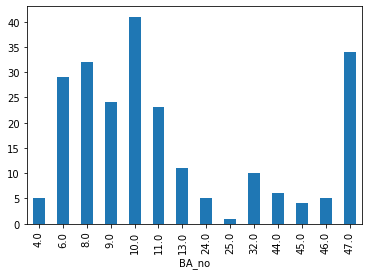

In [54]:
df_ba.groupby(['BA_no']).size().plot(kind='bar')


<AxesSubplot:title={'center':'Monetary Reward point counts BAs'}, xlabel='BA_no'>

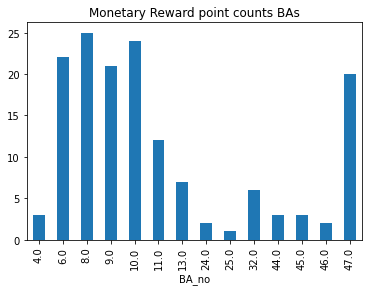

In [55]:
df = df_ba
mask = df['keywords'].str.contains('monetary reward')
df[mask].groupby(['BA_no']).size().plot(kind='bar',title="Monetary Reward point counts BAs")

<AxesSubplot:title={'center':'Taste Reward BAs'}, xlabel='BA_no'>

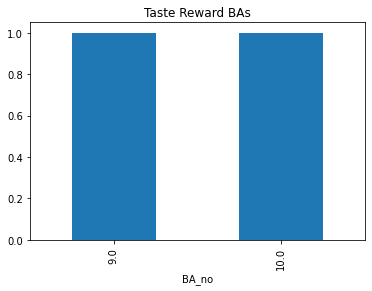

In [56]:
df = df_ba
mask = df['keywords'].str.contains('food')
df[mask].groupby(['BA_no']).size().plot(kind='bar',title="Taste Reward BAs")